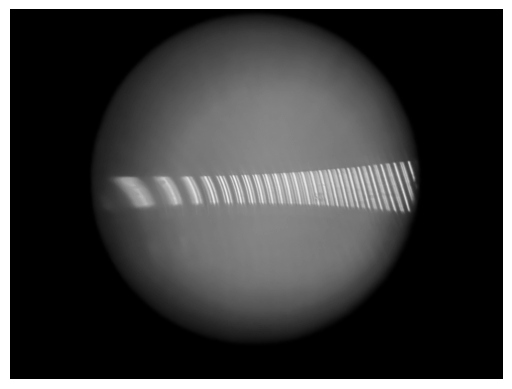

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.signal import find_peaks

# Load the image
image_path = 'Data/with_magnetic_field.jpg'
img = mpimg.imread(image_path)

# Check if the image is in grayscale or color
if len(img.shape) == 3 and img.shape[2] == 3:
    # Convert color image to grayscale
    img_gray = img.mean(axis=2)
else:
    img_gray = img

# Display the grayscale image
plt.imshow(img_gray, cmap='gray')
plt.axis('off')  # Hide axes for better visualization
plt.show()

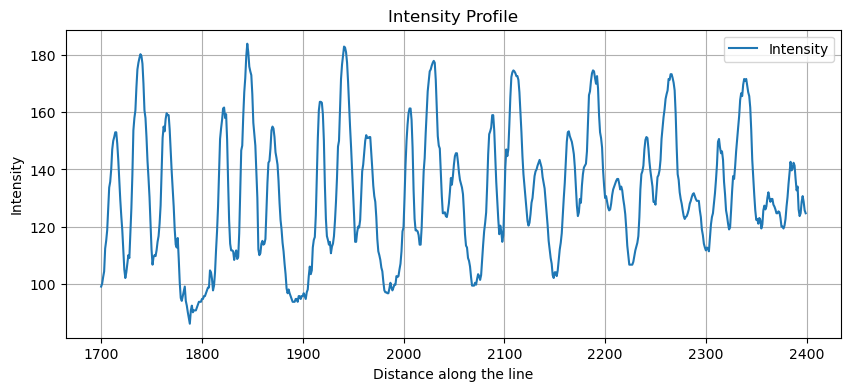

In [4]:
range_start = 1700
range_end = 2400

# We will choose a horizontal line in the middle of the image for simplicity
y = img_gray.shape[0] // 2 - 100
x = np.arange(img_gray.shape[1])[range_start:range_end]

# Extract the intensity values along the line
line_intensities = img_gray[y, range_start:range_end]

# Plot the intensity profile
plt.figure(figsize=(10, 4))
plt.plot(x, line_intensities, label='Intensity')
plt.xlabel('Distance along the line')
plt.ylabel('Intensity')
plt.title('Intensity Profile')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
# Use SciPy's find_peaks to identify the peaks in the intensity profile
peaks, _ = find_peaks(line_intensities, height=155,prominence=1, width=1, distance=20)  # height threshold might need adjustment
peaks += range_start
print(peaks)

[1611 1726 1830 1926 2013 2098 2179 2259 2339 2424 2509]


In [70]:
average_distance = np.mean(np.diff(peaks))
distance_std = np.std(np.diff(peaks))
print(average_distance, distance_std)

89.8 11.05260150371848
